In [1]:
library(ggplot2)
library(cowplot)
library(forcats)
library(ggrepel)
library(dplyr)
library(reshape2)
library(patchwork)
library(tidyr)
library(mmtable2)
library(vistime)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths



Attaching package: ‘mmtable2’


The following object is masked from ‘package:tidyr’:

    table1




In [2]:
irish_case_data <- read.csv("../outputFiles/irish_case_data.csv")
irish_case_data$index <- as.Date(irish_case_data$index)
irish_case_data$date <- as.Date(irish_case_data$date)
summary(irish_case_data)

     index                 date            X7_day_cases_per_100k
 Min.   :2020-02-26   Min.   :2020-02-26   Min.   :  0.000      
 1st Qu.:2020-09-21   1st Qu.:2020-09-22   1st Qu.:  5.128      
 Median :2021-04-17   Median :2021-04-17   Median : 16.080      
 Mean   :2021-04-16   Mean   :2021-04-17   Mean   : 42.581      
 3rd Qu.:2021-11-10   3rd Qu.:2021-11-10   3rd Qu.: 60.301      
 Max.   :2022-06-22   Max.   :2022-06-22   Max.   :472.075      
                      NA's   :1                                 
 X7_day_hospitalisations_per_100k X7_day_deaths_per_100k   areaName        
 Min.   :0.0000                   Min.   :0.00000        Length:1659       
 1st Qu.:0.2565                   1st Qu.:0.03772        Class :character  
 Median :0.8522                   Median :0.14400        Mode  :character  
 Mean   :1.1701                   Mean   :0.20633                          
 3rd Qu.:1.8954                   3rd Qu.:0.24300                          
 Max.   :5.4360         

In [3]:
grid_names <- c(
  'X7_day_cases_per_100k'="Cases",
  'X7_day_hospitalisations_per_100k'="Hospital admissions",
  'X7_day_deaths_per_100k'="Deaths"
)


Warning message:
“attributes are not identical across measure variables; they will be dropped”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


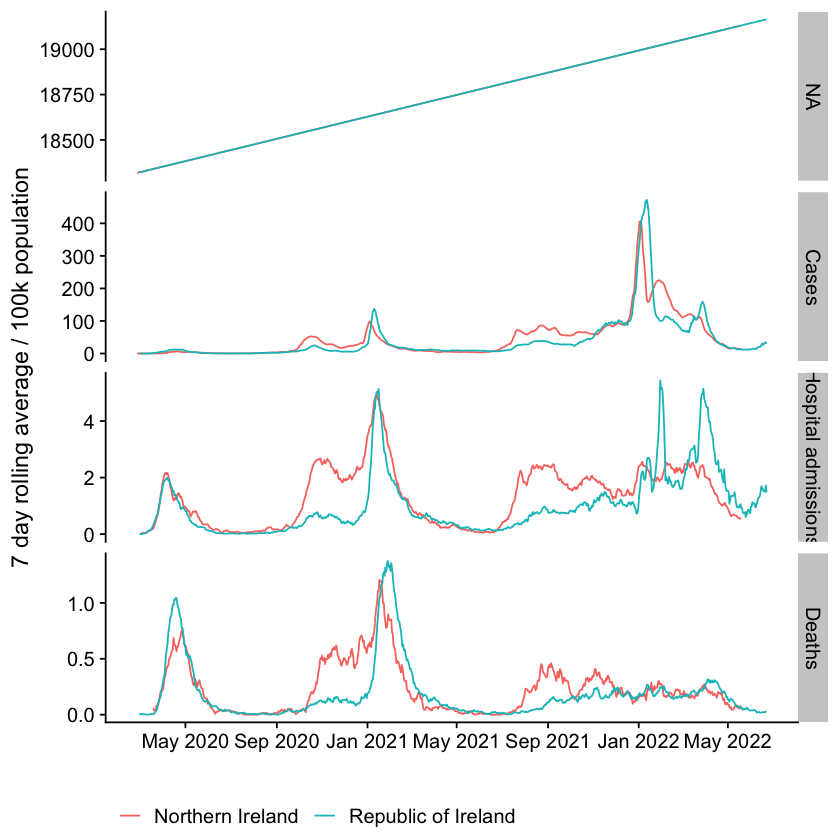

In [4]:
ggplot(melt(irish_case_data, id=c("areaName","date")) , aes(x=date,y=value,color=areaName)) +
theme_cowplot() +
facet_grid(rows=vars(variable),scales = "free_y", labeller = as_labeller(grid_names)) +
geom_line() +
labs(x = "", y = "7 day rolling average / 100k population") +
scale_color_discrete(name="") +
scale_x_date(labels = scales::date_format("%b %Y"), 
           breaks = scales::date_breaks("4 month")) +
theme(legend.position = "bottom")

In [57]:
ggsave('../outputFiles/figures/irish_case_data.svg', width=20, height=15, units = "cm")

In [5]:
df_rect <- data.frame(
    x = c(as.Date('2020-02-01'), as.Date('2020-06-15'), as.Date('2020-10-15'), as.Date('2021-03-01'), as.Date('2021-11-01'), as.Date('2021-12-01')),
    xend = c(as.Date('2020-05-31'), as.Date('2020-10-31'), as.Date('2021-02-28'), as.Date('2021-07-31'), as.Date('2022-01-31'), as.Date('2022-03-31')),
    y = c(100, 50, 100, 50, 100, 50),
    yend = c(100, 50, 100, 50, 100, 50),
    label = c('Timepoint A\nInitial introductions', 'Timepoint B\nB.1.177 introductions', 'Timepoint C\nAlpha introductions', 'Timepoint D\nDelta introductions', 'Timepoint E\nOmicron introductions', 'Timepoint F\nBA.2 introductions')
)
df_rect

cols1 <- c("Northern Ireland" = "#CC79A7",
          "Republic of Ireland" = "#0072B2",
          'Timepoint A\nInitial introductions' = '#b0f2bc',
          'Timepoint B\nB.1.177 introductions' = '#89e8ac',
          'Timepoint C\nAlpha introductions' = '#67dba5',
          'Timepoint D\nDelta introductions' = '#4cc8a3',
          'Timepoint E\nOmicron introductions' = '#38b2a3',
          'Timepoint F\nBA.2 introductions' = '#2c98a0',
          'Timepoint G\nRecombinant introductions' = '#257d98'
         )
cols2 <- c('Timepoint A\nInitial introductions' = '#b0f2bc',
          'Timepoint B\nB.1.177 introductions' = '#89e8ac',
          'Timepoint C\nAlpha introductions' = '#67dba5',
          'Timepoint D\nDelta introductions' = '#4cc8a3',
          'Timepoint E\nOmicron introductions' = '#38b2a3',
          'Timepoint F\nBA.2 introductions' = '#2c98a0',
          'Timepoint G\nRecombinant introductions' = '#257d98'
         )

x,xend,y,yend,label
<date>,<date>,<dbl>,<dbl>,<chr>
2020-02-01,2020-05-31,100,100,Timepoint A Initial introductions
2020-06-15,2020-10-31,50,50,Timepoint B B.1.177 introductions
2020-10-15,2021-02-28,100,100,Timepoint C Alpha introductions
2021-03-01,2021-07-31,50,50,Timepoint D Delta introductions
2021-11-01,2022-01-31,100,100,Timepoint E Omicron introductions
2021-12-01,2022-03-31,50,50,Timepoint F BA.2 introductions


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


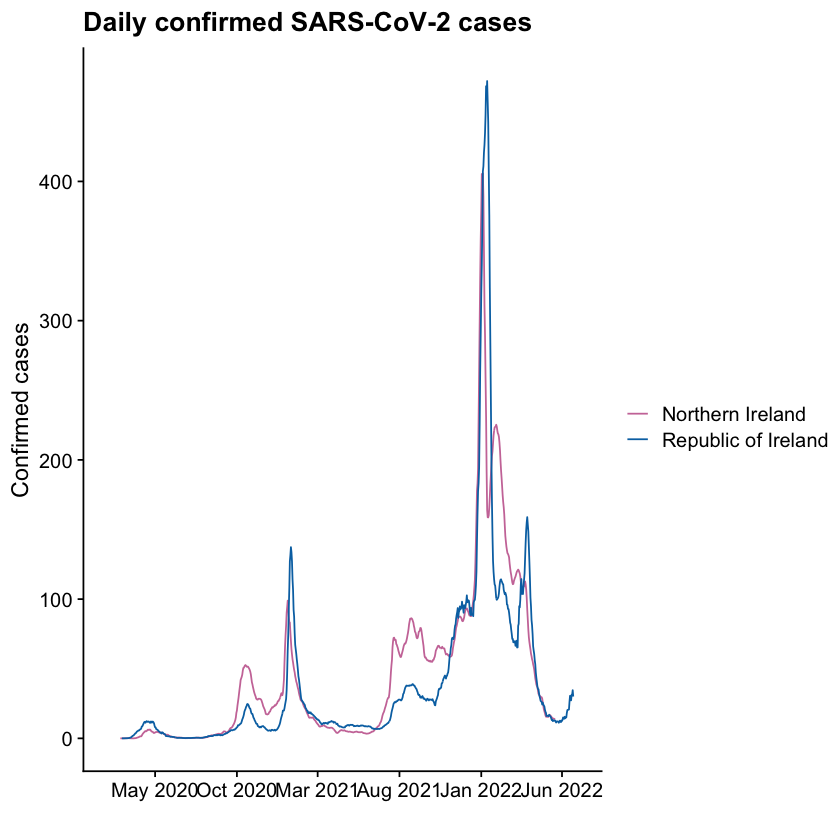

In [6]:
irish_case_plot <- ggplot(irish_case_data) +
theme_cowplot() +
geom_line(aes(x=date,y=X7_day_cases_per_100k,color=areaName)) +
labs(x = "", y = "Confirmed cases") +
scale_colour_manual(name = "", values = cols1, breaks = c("Northern Ireland", "Republic of Ireland")) + 
scale_fill_manual(name = "", values = cols2, guide="none") + 
scale_x_date(labels = scales::date_format("%b %Y"), 
           breaks = scales::date_breaks("5 month"),
            limits = c(as.Date("2020-02-01"), as.Date("2022-07-01"))) +
theme(legend.position = "right") + 
  ggtitle('Daily confirmed SARS-CoV-2 cases')

irish_case_plot

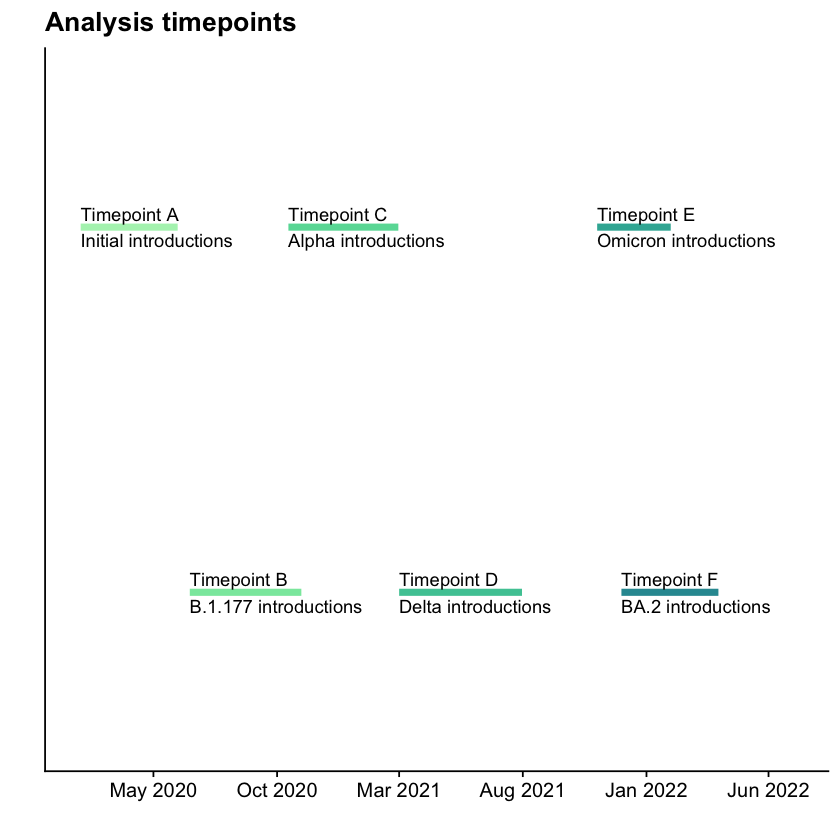

In [7]:
timepoints_plot <- ggplot(df_rect) +
theme_cowplot() +
#geom_rect(aes(xmin = x, xmax = xend, ymin = -Inf, ymax = Inf, fill=label), alpha = 0.25, show.legend = FALSE) +
geom_segment(aes(x = x, y = y, xend = xend, yend = yend, color=label), size = 2, show.legend = FALSE) +
geom_text(aes(x=x, y=y, label=label), color="black", hjust=0, show.legend = FALSE) +
labs(x = "", y = "") +
scale_colour_manual(name = "", values = cols1, breaks = c("Northern Ireland", "Republic of Ireland")) + 
scale_fill_manual(name = "", values = cols2, guide="none") + 
scale_x_date(labels = scales::date_format("%b %Y"), 
           breaks = scales::date_breaks("5 month"),
            limits = c(as.Date("2020-02-01"), as.Date("2022-07-01"))) +
coord_cartesian(ylim = c(30, 120)) + 
theme(legend.position = "top",
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
  ggtitle('Analysis timepoints')

timepoints_plot

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


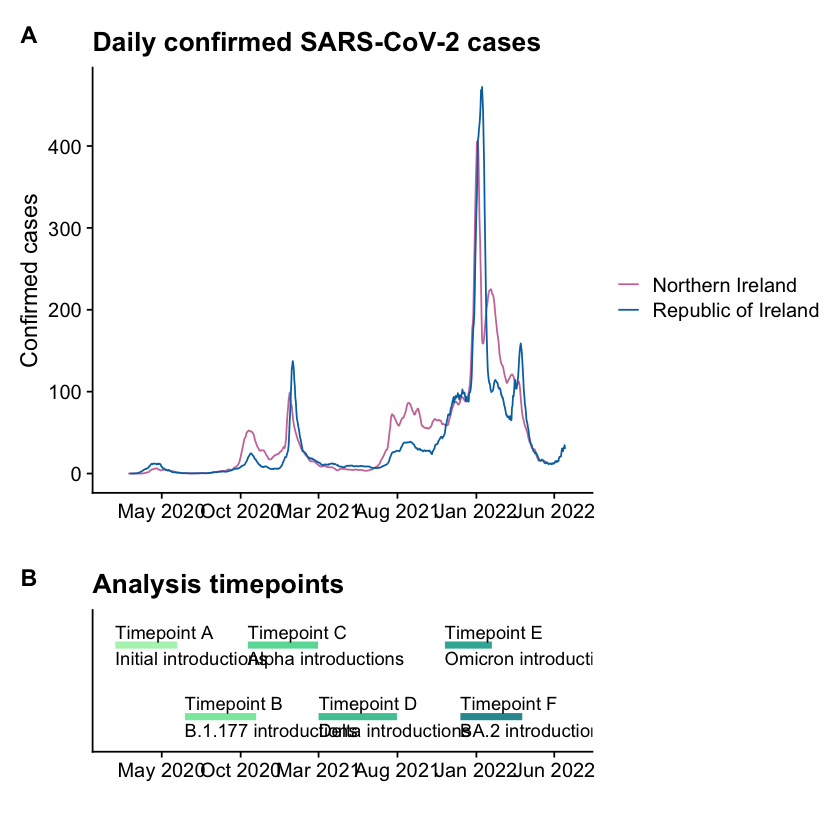

In [8]:
irish_case_plot / timepoints_plot + plot_layout(heights = unit(c(9, 3), c('cm', 'cm'))) + plot_annotation(tag_levels = 'A')

In [110]:
ggsave('../outputFiles/figures/irish_timeline.svg', width=20, height=20, units = "cm")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


In [9]:
sequenced_data <- read.csv('../datasets/GISAID/metadata_tsv_2022_06_04/metadata.RoIAndNI.tsv', sep='\t')
sequenced_data$Collection.date2 <- as.Date(sequenced_data$Collection.date)
summary(sequenced_data)

  Virus.name            Type           Accession.ID       Collection.date   
 Length:132987      Length:132987      Length:132987      Length:132987     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Location         Additional.location.information Sequence.length
 Length:132987      Length:132987                   Min.   :  259  
 Class :character   Class :character                1st Qu.:29714  
 Mode  :character   Mode  :character                Median :29744  
                                                    Mean   :29723  
                                            

In [10]:
sequenced_data$reduced_pango <- 'other'
#metadata[ which(metadata$Pango == 'B.1.1'
#| substr(metadata$Pango, 1, 6) == 'B.1.1.'), ]$reduced_pango <- 'B.1.1'

sequenced_data[ which(sequenced_data$Pango.lineage == 'B.1.177'
| substr(sequenced_data$Pango.lineage, 1, 8) == 'B.1.177.'), ]$reduced_pango <- 'B.1.177'
sequenced_data[ which(sequenced_data$Pango.lineage == 'B.1.1.7'
| substr(sequenced_data$Pango.lineage, 1, 8) == 'B.1.1.7.'), ]$reduced_pango <- 'B.1.1.7'
sequenced_data[ which(sequenced_data$Pango.lineage == 'B.1.617.2'
| substr(sequenced_data$Pango.lineage, 1, 10) == 'B.1.617.2.' | substr(sequenced_data$Pango.lineage, 1, 3) == 'AY.'), ]$reduced_pango <- 'B.1.617.2/AY'
sequenced_data[ which(sequenced_data$Pango.lineage == 'BA.1'
| substr(sequenced_data$Pango.lineage, 1, 5) == 'BA.1.'), ]$reduced_pango <- 'BA.1'
sequenced_data[ which(sequenced_data$Pango.lineage == 'BA.2'
| substr(sequenced_data$Pango.lineage, 1, 5) == 'BA.2.'), ]$reduced_pango <- 'BA.2'

In [11]:
table(sequenced_data$Simple.country, sequenced_data$reduced_pango)

                     
                      B.1.1.7 B.1.177 B.1.617.2/AY  BA.1  BA.2 other
  Northern Ireland       7832     763        34088  5675 11192  2000
  Republic of Ireland   16295    1053        29454 12806  8457  3372

In [12]:
sequenced_data$reduced_pango <- as.factor(sequenced_data$reduced_pango)

In [13]:
sequenced_data$reduced_pango <- factor(sequenced_data$reduced_pango, levels = c('other', 'B.1.177', 'B.1.1.7', 'B.1.617.2/AY', 'BA.1', 'BA.2'))

In [14]:
by_month <- function(x,n=1){
  seq(min(x,na.rm=T),max(x,na.rm=T),by=paste0(n," month"))
}
by_week <- function(x,n=1){
  seq(min(x,na.rm=T),max(x,na.rm=T),by=paste0(n," week"))
}

Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”


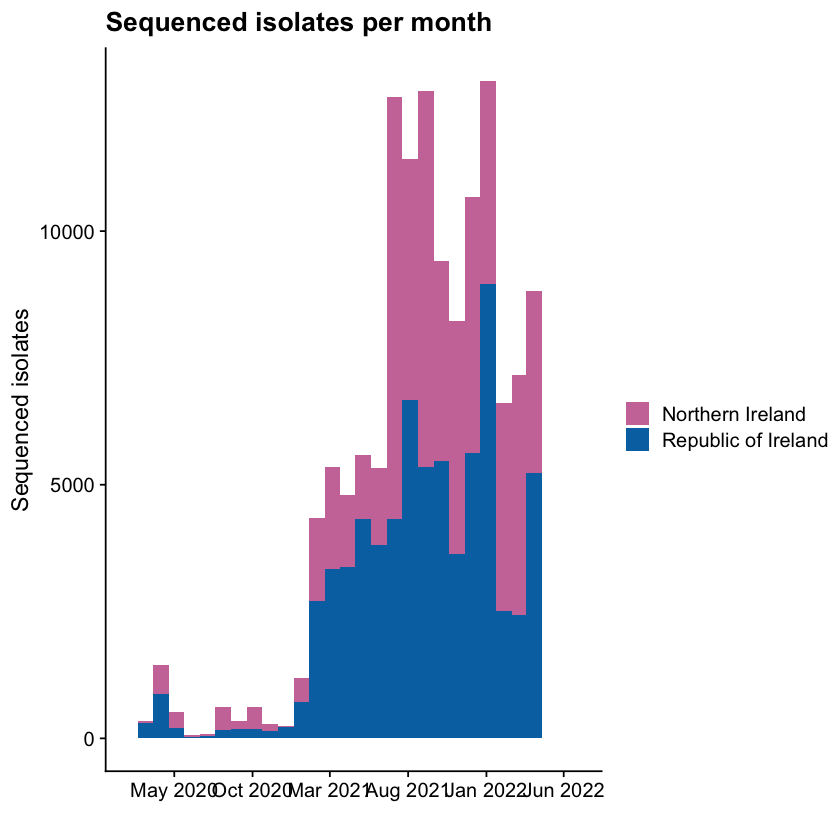

In [15]:
seqs_month <- ggplot(sequenced_data, aes(x = Collection.date2, fill = Simple.country)) +
scale_x_date(name="",labels = scales::date_format("%b %Y"), 
           breaks = scales::date_breaks("5 month"),
            limits = c(as.Date("2020-02-01"), as.Date("2022-07-01"))) +
#facet_grid(rows = vars(Simple.country)) +
geom_histogram(breaks = by_month(sequenced_data$Collection.date2), position = "stack") + 
theme_cowplot() +
theme(legend.position = "right") +
scale_y_continuous(name="Sequenced isolates") +
scale_fill_manual(name = "", values = cols1, breaks = c("Northern Ireland", "Republic of Ireland"))+ 
  ggtitle('Sequenced isolates per month')

seqs_month

Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”


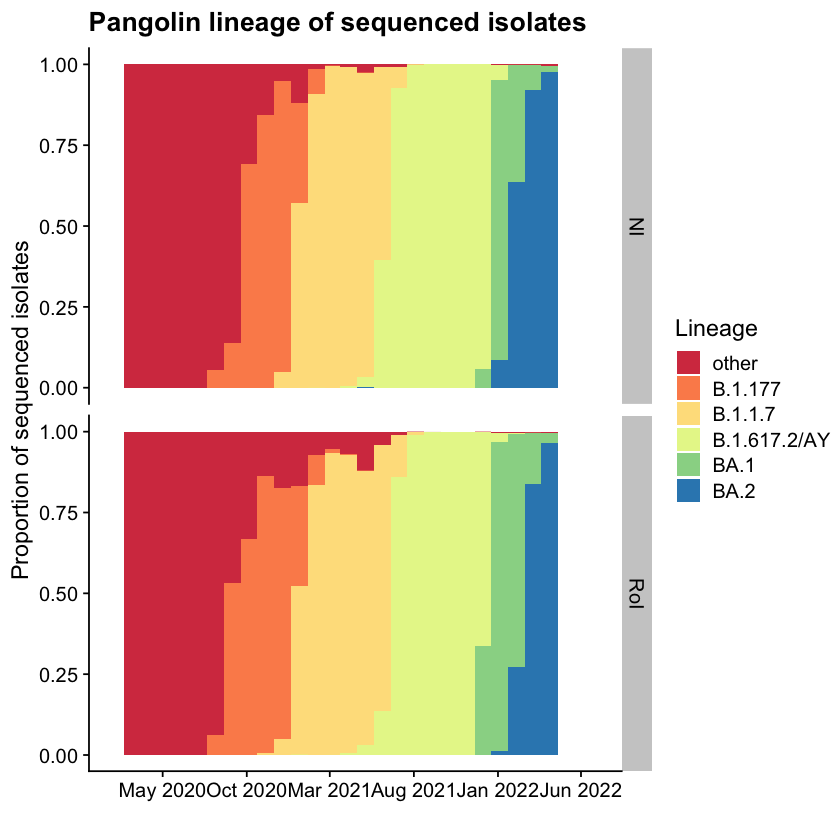

In [16]:
country_abbr <- c(
                    "Northern Ireland" = "NI",
                    "Republic of Ireland" = "RoI"
                    )

pango_month <- ggplot(sequenced_data, aes(x = Collection.date2, fill = reduced_pango)) +
geom_histogram(breaks = by_month(sequenced_data$Collection.date2), position = "fill") +
scale_x_date(name="",labels = scales::date_format("%b %Y"), 
           breaks = scales::date_breaks("5 month"),
            limits = c(as.Date("2020-02-01"), as.Date("2022-07-01"))) +
theme_cowplot() +
facet_grid(rows = vars(Simple.country), labeller = as_labeller(country_abbr)) +
scale_fill_brewer(name="Lineage",
                  palette = "Spectral",
                 limits = c('other', 'B.1.177', 'B.1.1.7', 'B.1.617.2/AY', 'BA.1', 'BA.2'),
    labels = c('other', 'B.1.177', 'B.1.1.7', 'B.1.617.2/AY', 'BA.1', 'BA.2')) +
theme(legend.position="right") + 
scale_y_continuous(name="Proportion of sequenced isolates")+ 
ggtitle('Pangolin lineage of sequenced isolates')

pango_month

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”


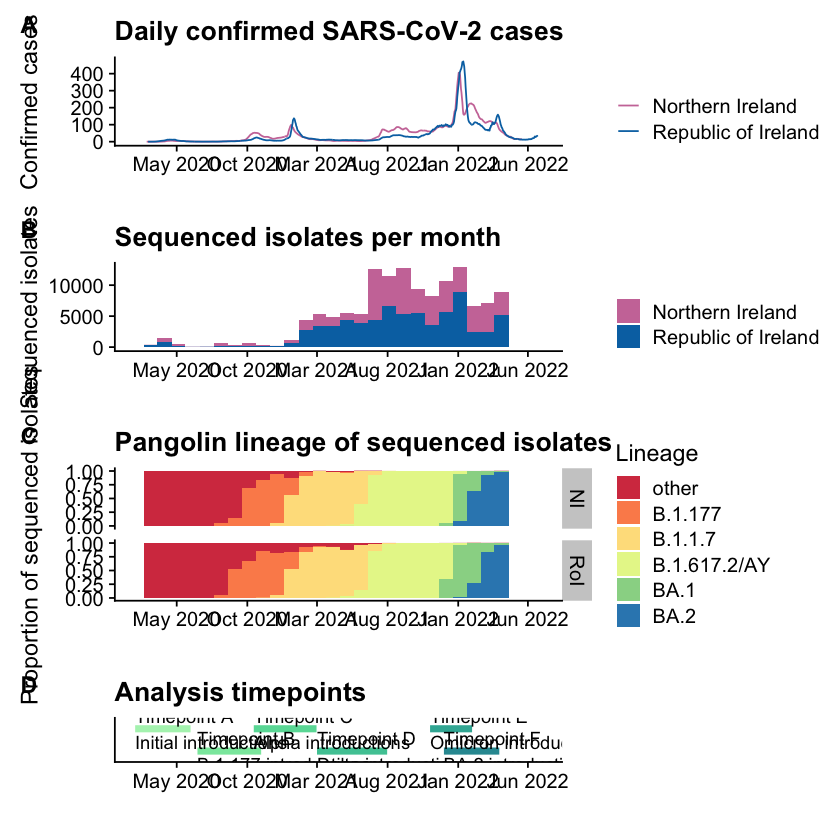

In [17]:
irish_case_plot / seqs_month / pango_month / timepoints_plot + plot_layout(heights = c(4, 4, 6, 2)) + plot_annotation(tag_levels = 'A')

In [18]:
ggsave('../outputFiles/figures/irish_timeline.svg', width=25, height=28, units = "cm")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”


In [19]:
ggsave('../outputFiles/figures/irish_timeline.png', width=25, height=28, units = "cm")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”


In [20]:
ggsave('../outputFiles/figures/irish_timeline.pdf', width=25, height=28, units = "cm")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 169 rows containing non-finite values (stat_bin).”
